In [ ]:
def transform_plot(points,type,color):
    

[[ 0.         0.8660254  1.3660254  0.5        0.       ]
 [ 0.         0.5       -0.3660254 -0.8660254  0.       ]
 [ 1.         1.         1.         1.         1.       ]]


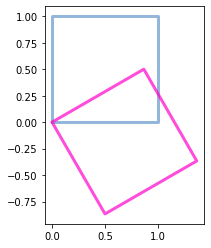

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import string
# points a, b and, c
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)
# matrix with row vectors of points
P = np.array([a, b, c, d]).T
#print(P)
# H = np.identity(3)
# H[0,0] = 2
# H[1,1] = 2
# H[2, 0] = 0.3
# H[2, 1] = 0.5

t1,t2 = -0.6,0.5
T = [[1, 0, t1], [0, 1, t2], [0, 0, 1]] #translation

t = np.pi/3
H = [[np.cos(t), np.sin(t), 0.], [-np.sin(t), np.cos(t), 0.], [0., 0., 1.]] #rotation

s1,s2 = 1.4,1.6
S = [[s1, 0, 0], [0, s2, 0], [0, 0, 1]] #scalling

a1,a2 = 2,1.2
S = [[1, a, 0], [0, 1, 0], [0, 0, 1]] #shear

#print(H)
Pt = np.matmul(H, P)
P = P/P[-1, :]
P = np.insert(P,4,P[:,0],axis=1)
x = P[0, :]
y = P[1, :]
Pt = Pt/Pt[-1, :]
Pt = np.insert(Pt,4,Pt[:,0],axis=1)
xt = Pt[0, :]
yt = Pt[1, :]
1
print(Pt)
fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
ax.plot(x, y, color='#6699cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')
ax.plot(xt, yt, color='#ff00cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')